In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from treatment import get_treated_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
X_train, X_test, y_train, y_test = get_treated_data()

In [3]:
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [4]:
y_pred = mlp_model.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9611111111111111


In [6]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1624
           1       0.93      1.00      0.96      1616

    accuracy                           0.96      3240
   macro avg       0.96      0.96      0.96      3240
weighted avg       0.96      0.96      0.96      3240



In [7]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

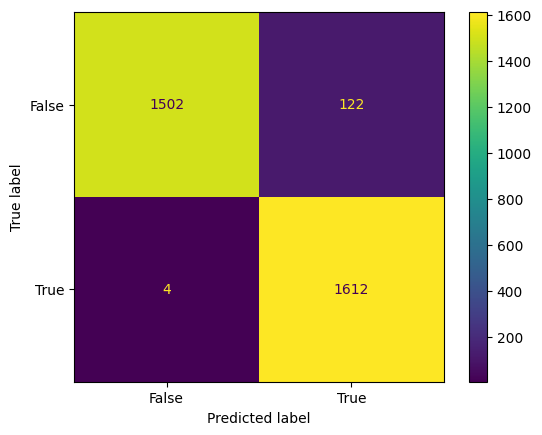

In [8]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [9]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['logistic', 'relu'],  
    'solver': ['adam'],
    'learning_rate': ['constant', 'adaptive'],
}

In [ ]:
grid_search = GridSearchCV(mlp_model, param_grid, refit = True, verbose = 1) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


In [ ]:
best_mlp_model = grid_search.best_estimator_

In [ ]:
best_mlp_model.fit(X_train, y_train)

In [ ]:
grid_pred = best_mlp_model.predict(X_test)

In [ ]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

In [ ]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

In [ ]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

In [ ]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()

In [ ]:
# test_text = "Congratulations! You've won a free vacation. Claim your prize now!"

# processed_test_text = finalpreprocess(test_text)

# print("Texto de teste após pré-processamento:", processed_test_text)

# prediction = best_decision_tree_model.predict(processed_test_text)

# if prediction[0]:
#     print("O texto é spam!")
# else:
#     print("O texto não é spam (ham)!")